In [1]:
import numpy as np
import cv2

## Images

In [9]:
img = cv2.imread('im.jpg', cv2.IMREAD_GRAYSCALE)

In [10]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
cv2.imwrite('im_gs.jpg', img)

True

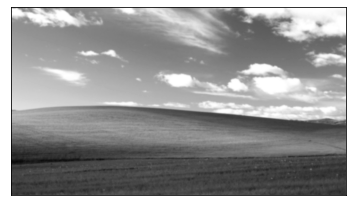

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

## Video

In [13]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('out.avi', fourcc, 20.0, (640, 480))

while True:
    ret, frame = cap.read()
    
    if ret != True:
        break

    frame = cv2.flip(frame, 0)
    out.write(frame)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

## Drawing

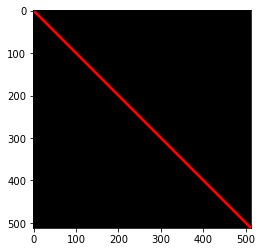

In [44]:
w, h = (512, 512)
img = np.zeros((w, h, 3), np.uint8)

img = cv2.line(img, (0, 0), (w, h), (255, 0, 0), 5)

plt.imshow(img)
plt.show()

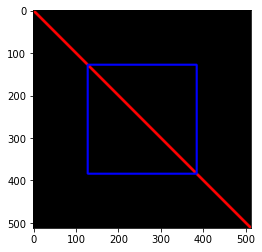

In [45]:
img = cv2.rectangle(img, (w // 2 - 128, h // 2 - 128), (w // 2 + 128, h // 2 + 128), (0, 0, 255), 3)

plt.imshow(img)
plt.show()

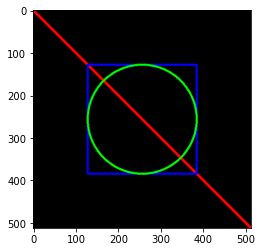

In [46]:
img = cv2.circle(img, (w // 2, h // 2), 128, (0, 255, 0), 3)

plt.imshow(img)
plt.show()

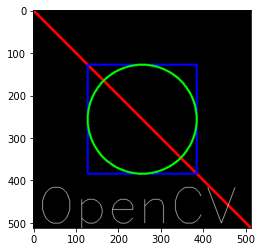

In [47]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 1, cv2.LINE_AA)

plt.imshow(img)
plt.show()

## Mouse

In [6]:
w, h = 512, 512
img = np.zeros((w, h, 3), np.uint8)
img = img.fill(255)

In [2]:
drawing = False 
mode = True 
ix,iy = -1,-1

def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [3]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)

    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()